In [11]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")

# Wrap the environment
env.reset()

(array([[ 1.        ,  0.9032334 ,  0.5       ,  0.3125    ,  0.        ],
        [ 1.        ,  0.11166683,  0.        , -0.03990904,  0.        ],
        [ 1.        ,  0.20780078, -0.5       , -0.02868996,  0.        ],
        [ 1.        ,  0.31580195, -0.25      , -0.0480758 ,  0.        ],
        [ 1.        ,  0.41076502, -0.5       , -0.0460578 ,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': 2,
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.6666666666666666,
   'high_speed_reward': 0.8333333333333334,
   'on_road_reward': 1.0,
   'reverse_reward': 0.0,
   'stopping_penalty': 0}})

In [2]:
# Create the SAC model
model = DQN(
    "MlpPolicy",
    env,
    policy_kwargs=dict(net_arch=[256, 256]),
    learning_rate=5e-4,
    buffer_size=15000,
    learning_starts=200,
    batch_size=32,
    gamma=0.8,
    train_freq=1,
    gradient_steps=1,
    target_update_interval=50,
    verbose=1,
    tensorboard_log="highway_dqn",
)

# Train the model
model.learn(total_timesteps=15000,tb_log_name = 'DQN_1')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn\DQN_1_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 8.29     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5        |
|    time_elapsed     | 7        |
|    total_timesteps  | 40       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5        |
|    time_elapsed     | 18       |
|    total_timesteps  | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |


In [14]:
model.learn(total_timesteps=5000, tb_log_name="DQN_1",reset_num_timesteps=False)

Logging to highway_dqn\DQN_1_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 30       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 996      |
|    fps              | 0        |
|    time_elapsed     | 122      |
|    total_timesteps  | 30111    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0884   |
|    n_updates        | 29910    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.2     |
|    ep_rew_mean      | 30       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 0        |
|    time_elapsed     | 279      |
|    total_timesteps  | 30239    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 

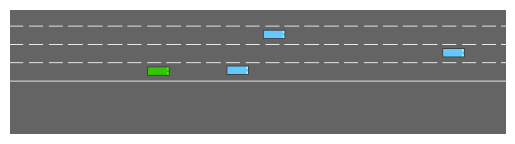

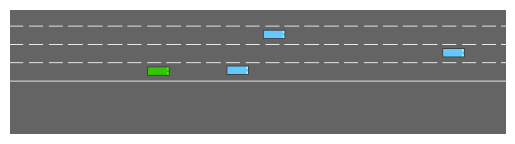

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# modewl = TD3.load("td3_highway_model")
# # Create the environment
# env = gym.make("highway-v1",render_mode="rgb_array")

# # Configure the environment for continuous actions
# env.unwrapped.configure({
#     "action": {"type": "ContinuousAction"},
#     "duration": 40,  # [s]
#     "lanes_count": 4,
#     "vehicles_count": 50,
#     "controlled_vehicles": 1,
#     "initial_lane_id": None,
#     "ego_spacing": 2,
#     "collision_reward": -1,  
#     "right_lane_reward": 0.4,
#     "high_speed_reward": 0.8,
#     "lane_change_reward": 0,
#     "reward_speed_range": [10, 30],
#     "reverse_reward": -2,
#     "stopping_penalty": -2,
#     "normalize_reward": True,
#     "offroad_terminal": False,
# })

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [5]:
model = DQN.load("DQN_highwayv1")

In [4]:
# Save the trained model
model.save("DQN_highwayv1")

Testing TD3 Model on Highway-v0 Environment
Episode 1: Reward = 35.53, Length = 40 timesteps
Episode 2: Reward = 37.15, Length = 40 timesteps
Episode 3: Reward = 35.46, Length = 40 timesteps
Episode 4: Reward = 35.04, Length = 40 timesteps
Episode 5: Reward = 35.04, Length = 40 timesteps
Episode 6: Reward = 11.07, Length = 13 timesteps
Episode 7: Reward = 34.92, Length = 40 timesteps
Episode 8: Reward = 35.53, Length = 40 timesteps
Episode 9: Reward = 36.19, Length = 40 timesteps
Episode 10: Reward = 34.92, Length = 40 timesteps
Episode 11: Reward = 8.25, Length = 11 timesteps
Episode 12: Reward = 35.71, Length = 40 timesteps
Episode 13: Reward = 33.52, Length = 40 timesteps
Episode 14: Reward = 36.50, Length = 40 timesteps
Episode 15: Reward = 35.89, Length = 40 timesteps
Episode 16: Reward = 35.89, Length = 40 timesteps
Episode 17: Reward = 16.78, Length = 19 timesteps
Episode 18: Reward = 33.40, Length = 40 timesteps
Episode 19: Reward = 35.77, Length = 40 timesteps
Episode 20: Rewa

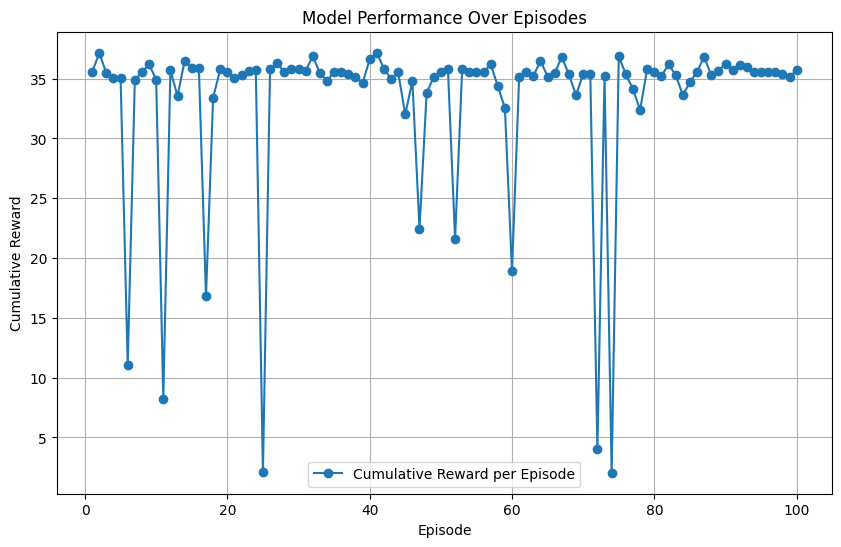

In [15]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

timestep_rewards = []
cumulative_rewards = []
timesteps = []

# Run the trained model for testing
current_timestep = 0

print("Testing TD3 Model on Highway-v0 Environment")

for episode in range(100):  # Test over 10 episodes
    done = truncated = False
    obs, info = env.reset()
    total_reward = 0
    episode_length = 0

    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        # Accumulate rewards and track timesteps
        total_reward += reward
        current_timestep += 1
        episode_length += 1
        env.render()

        # Log timestep data
        timestep_rewards.append(reward)
        timesteps.append(current_timestep)

    cumulative_rewards.append(total_reward)
    print(f"Episode {episode + 1}: Reward = {total_reward:.2f}, Length = {episode_length} timesteps")

env.close()


# Cumulative Rewards Plot
episodes = range(1, len(cumulative_rewards) + 1)
plt.figure(figsize=(10, 6))
plt.plot(episodes, cumulative_rewards, marker='o', label="Cumulative Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Model Performance Over Episodes")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# # Load the pre-trained DQN model
# model = DQN.load("DQN_highwayv1")

# # Create the highway-v1 environment
# env = gym.make("highway-v1", render_mode="rgb_array")  # Ensure highway-v1 is registered

# Number of test episodes
n_episodes = 100

# Exponential delay parameters
scale = 1.2  # Mean delay
max_delay = 2  # Maximum delay in seconds

# Run testing loop
for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0
    done = False
    episode_length = 0

    # Generate a random delay from an exponential distribution, capped at max_delay
    random_delay = min(np.random.exponential(scale), max_delay)

    while not done:
        action, _ = model.predict(obs, deterministic=True)

        # Apply the computation delay before executing the action
        env.unwrapped.elapse(random_delay)

        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        episode_length += 1
        done = terminated or truncated

    print(f"Episode {episode + 1}: Delay = {random_delay:.2f}s, "
          f"Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps")

env.close()


Episode 1: Delay = 2.00s, Total Reward = 0.34, Length = 1 timesteps
Episode 2: Delay = 1.18s, Total Reward = 1.10, Length = 2 timesteps
Episode 3: Delay = 1.56s, Total Reward = 34.31, Length = 40 timesteps
Episode 4: Delay = 2.00s, Total Reward = 2.22, Length = 3 timesteps
Episode 5: Delay = 0.66s, Total Reward = 35.22, Length = 40 timesteps
Episode 6: Delay = 2.00s, Total Reward = 34.79, Length = 40 timesteps
Episode 7: Delay = 0.09s, Total Reward = 35.22, Length = 40 timesteps
Episode 8: Delay = 0.61s, Total Reward = 35.83, Length = 40 timesteps
Episode 9: Delay = 0.28s, Total Reward = 35.71, Length = 40 timesteps
Episode 10: Delay = 0.68s, Total Reward = 35.10, Length = 40 timesteps
Episode 11: Delay = 1.24s, Total Reward = 31.53, Length = 36 timesteps
Episode 12: Delay = 1.97s, Total Reward = 35.28, Length = 40 timesteps
Episode 13: Delay = 0.10s, Total Reward = 35.77, Length = 40 timesteps
Episode 14: Delay = 0.27s, Total Reward = 14.72, Length = 17 timesteps
Episode 15: Delay = 0